In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() # Replace with cifar10 for CIFAR-10
# x_train, x_test: pixel values; y_train, y_test: labels

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0
model = models.Sequential([
layers.Flatten(input_shape=(28, 28)), # Flatten for MNIST, (32,32,3) for CIFAR-10
layers.Dense(128, activation='relu'),
layers.Dense(10, activation='softmax')
])

In [7]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5848 - loss: 1.6763 - val_accuracy: 0.8537 - val_loss: 0.5954
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8606 - loss: 0.5448 - val_accuracy: 0.8946 - val_loss: 0.4014
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8931 - loss: 0.3973 - val_accuracy: 0.9056 - val_loss: 0.3440
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9015 - loss: 0.3470 - val_accuracy: 0.9098 - val_loss: 0.3177
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9077 - loss: 0.3233 - val_accuracy: 0.9134 - val_loss: 0.3000
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9132 - loss: 0.3055 - val_accuracy: 0.9170 - val_loss: 0.2871
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9142 - loss: 0.2942 - val_accuracy: 0.9165 - val_loss: 0.2802
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9193 - loss: 0.2791 - 

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 0s - 1ms/step - accuracy: 0.9249 - loss: 0.2575
Test accuracy: 0.9248999953269958


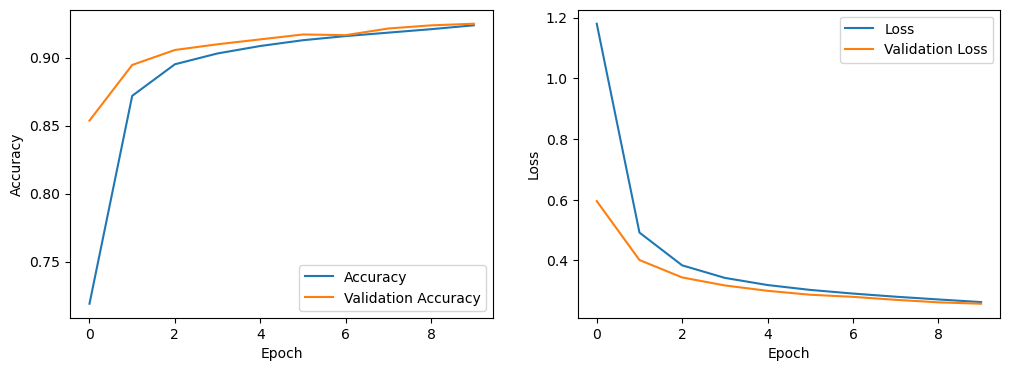

In [11]:
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label = 'Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()
plot_history(history)

In [13]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 22s 0us/step


In [15]:
# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0
# Define the CNN model
model = models.Sequential()

In [17]:
# Add convolutional layers, followed by pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.3429 - loss: 1.7636 - val_accuracy: 0.5381 - val_loss: 1.2868
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5732 - loss: 1.2056 - val_accuracy: 0.6187 - val_loss: 1.0959
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6394 - loss: 1.0163 - val_accuracy: 0.6572 - val_loss: 0.9870
313/313 - 1s - 4ms/step - accuracy: 0.6572 - loss: 0.9870
Test accuracy: 0.6571999788284302


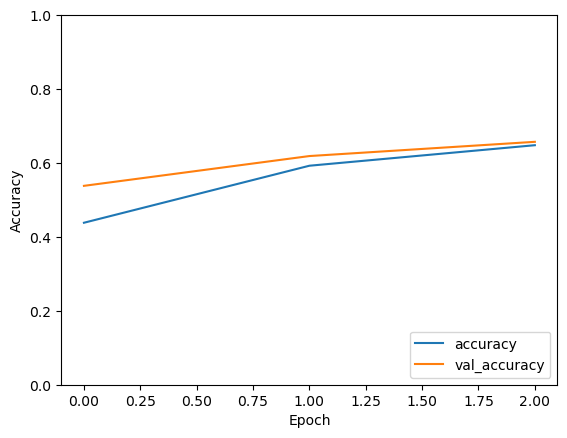

In [19]:
#Flatten the layer and add dense layers (fully connected layers)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10)) # CIFAR-10 has 10 classes
# Compile the model
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, epochs=3,
validation_data=(x_test, y_test))
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')
# Plot accuracy and loss curves
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2682 - loss: 2.0370 - val_accuracy: 0.3457 - val_loss: 1.8116
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3575 - loss: 1.7840 - val_accuracy: 0.3740 - val_loss: 1.7616
313/313 - 0s - 1ms/step - accuracy: 0.3740 - loss: 1.7616
ANN Test accuracy: 0.37400001287460327


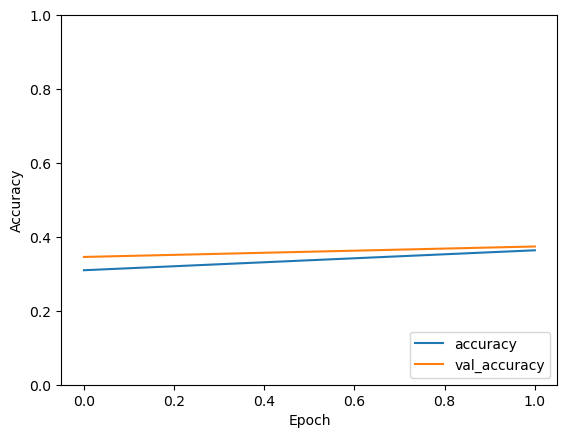

In [21]:
# Define a simple ANN model
ann_model = models.Sequential()
# Flatten the input (32x32x3) to a 1D vector
ann_model.add(layers.Flatten(input_shape=(32, 32, 3)))
ann_model.add(layers.Dense(128, activation='relu'))
ann_model.add(layers.Dense(10)) # CIFAR-10 has 10 output classes
# Compile the model
ann_model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])
# Train the model
ann_history = ann_model.fit(x_train, y_train, epochs=2,
validation_data=(x_test, y_test))
# Evaluate the model
ann_test_loss, ann_test_acc = ann_model.evaluate(x_test, y_test, verbose=2)
print(f'ANN Test accuracy: {ann_test_acc}')
# Plot accuracy and loss curves for ANN
plt.plot(ann_history.history['accuracy'], label='accuracy')
plt.plot(ann_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()